<h3> Importation des librairies

In [313]:
!pip install -U jupyter

In [314]:
!pip install -U pip

In [315]:
!pip install pca

In [316]:
!pip install sklearn

In [317]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [318]:
!Pip install shap

In [319]:
!pip install sklearn.cross_validation

ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation


In [320]:
!pip install pingouin

In [321]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#PCA

from pca import pca
from sklearn import decomposition
from sklearn import preprocessing
import plotly.express as px

#Régression linéaire
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

#ROC 

from sklearn.metrics import roc_auc_score

#Test statistique

import pingouin as pg
from pingouin import welch_anova, read_dataset

#Shap 

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
import shap

<h3> Importation des données 

In [322]:
filepath='file:///C:/Users/Lena/OneDrive/OpenClassRoom/Projet%206/notes.csv'
notes=pd.read_csv(filepath)

<h3> Visualisation des données

In [323]:
notes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


In [324]:
notes["is_genuine"].describe()

count      170
unique       2
top       True
freq       100
Name: is_genuine, dtype: object

<h3> Sélection des Vrai et Faux billets 

In [325]:
notes_true=notes.loc[(notes['is_genuine']==True)]
notes_true    

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
95,True,172.49,103.92,103.91,4.42,2.84,113.38
96,True,172.00,104.32,104.26,4.53,3.04,112.93
97,True,171.49,103.77,103.60,4.01,3.09,112.95
98,True,172.10,103.98,103.86,4.47,3.06,113.00


In [326]:
notes_false=notes.loc[(notes['is_genuine']==False)]
notes_false

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
100,False,171.45,104.03,104.26,4.88,3.44,111.92
101,False,171.97,104.38,104.18,5.59,3.47,110.98
102,False,171.94,104.21,104.10,4.28,3.47,112.23
103,False,172.04,104.34,104.48,4.88,3.28,112.15
104,False,171.75,104.16,104.23,5.75,3.25,111.68
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


In [327]:
notes_true.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200
std,0.307981,0.296251,0.292406,0.314509,0.197726,0.380476
min,171.040000,103.230000,103.140000,3.540000,2.270000,111.760000
25%,171.790000,103.740000,103.557500,3.900000,2.937500,112.995000
50%,172.005000,103.915000,103.760000,4.080000,3.070000,113.210000
75%,172.162500,104.145000,103.972500,4.382500,3.192500,113.505000
max,172.750000,104.860000,104.950000,5.040000,3.530000,113.980000


In [328]:
notes_false.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
std,0.297426,0.213130,0.253152,0.540846,0.185102,0.676931
min,171.380000,103.780000,103.440000,3.820000,2.980000,109.970000
25%,171.682500,104.082500,103.982500,4.952500,3.185000,111.270000
50%,171.875000,104.215000,104.170000,5.265000,3.335000,111.765000
75%,172.047500,104.377500,104.280000,5.702500,3.450000,111.985000
max,173.010000,104.720000,104.860000,6.280000,3.680000,113.640000


<h2> <center> Analyse 

<h3> Diagonale du billet en mm

Text(0, 0.5, 'Fréquence')

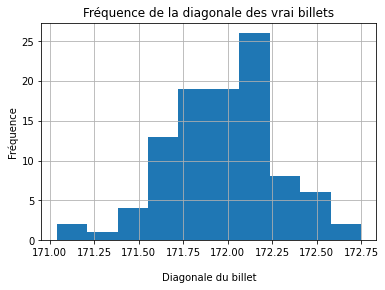

In [329]:
notes_true["diagonal"].hist()
plt.title("Fréquence de la diagonale des vrai billets")
plt.xlabel('\nDiagonale du billet')
plt.ylabel('Fréquence')

La majorité des vrai billet possèdent une diagonale entre 171.75 et 172.20 mm. 

Text(0, 0.5, 'Fréquence')

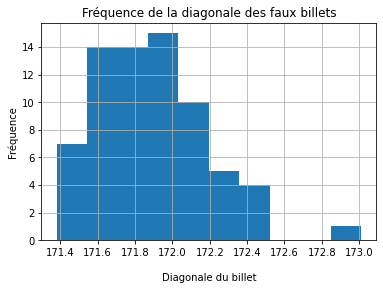

In [330]:
notes_false["diagonal"].hist()
plt.title("Fréquence de la diagonale des faux billets")
plt.xlabel('\nDiagonale du billet')
plt.ylabel('Fréquence')

La majorité des faux billet possèdent une diagonale entre 171.6 et 172 mm.

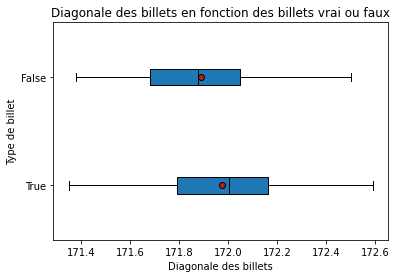

In [331]:
X = "is_genuine"
Y = "diagonal"

sous_echantillon = notes


modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title('Diagonale des billets en fonction des billets vrai ou faux')
plt.xlabel('Diagonale des billets')
plt.ylabel('Type de billet')
plt.show()

In [332]:
aov_pop = welch_anova(dv='diagonal', between='is_genuine', data=notes)

aov_pop

,Source,ddof1,ddof2,F,p-unc,np2
0,is_genuine,1,151.833526,3.36208,0.068672,0.019383


Le test d'anova a montré une p-value supérieur a 0.05 donc il n'y a pas de différence significative entre la diagonale des vrai et faux billet.

<h3> Hauteur du billet mesurée sur le côté gauche (en mm)

Text(0, 0.5, 'Fréquence')

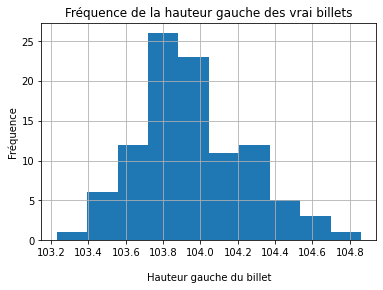

In [333]:
notes_true["height_left"].hist()
plt.title("Fréquence de la hauteur gauche des vrai billets")
plt.xlabel('\nHauteur gauche du billet')
plt.ylabel('Fréquence')

La majorité des vrai billet possèdent une hauteur gauche du billet entre 103.7 et 104 mm.

Text(0, 0.5, 'Fréquence')

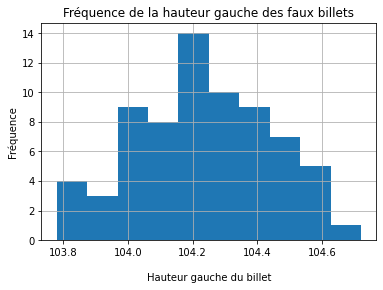

In [334]:
notes_false["height_left"].hist()
plt.title("Fréquence de la hauteur gauche des faux billets")
plt.xlabel('\nHauteur gauche du billet')
plt.ylabel('Fréquence')

La majorité des vrai faux possèdent une hauteur gauche du billet entre 104.2 et 104.3 mm.

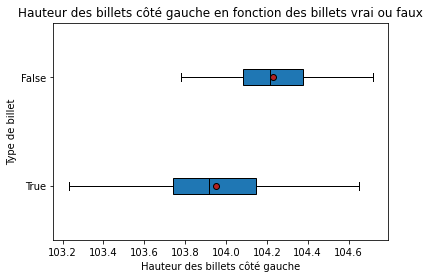

In [335]:
X = "is_genuine"
Y = "height_left"

sous_echantillon = notes


modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title('Hauteur des billets côté gauche en fonction des billets vrai ou faux')
plt.xlabel('Hauteur des billets côté gauche')
plt.ylabel('Type de billet')
plt.show()

In [336]:
aov_pop = welch_anova(dv='height_left', between='is_genuine', data=notes)

aov_pop

,Source,ddof1,ddof2,F,p-unc,np2
0,is_genuine,1,167.856758,50.964855,2.708399e-11,0.213195


Le test d'anova a montré une p-value inférieur a 0.05 donc il y a une différence significative entre la hauteur gauche des vrai et des faux billets. Le faux billet aurait une hauteur plus grande. 

<h3> Hauteur du billet mesurée sur le côté droit (en mm)

Text(0, 0.5, 'Fréquence')

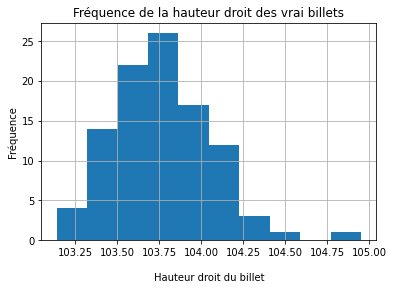

In [337]:
notes_true["height_right"].hist()
plt.title("Fréquence de la hauteur droit des vrai billets")
plt.xlabel('\nHauteur droit du billet')
plt.ylabel('Fréquence')

La majorité des vrai billets possèdent une hauteur droit du billet entre 103.5 et 104 mm.

Text(0, 0.5, 'Fréquence')

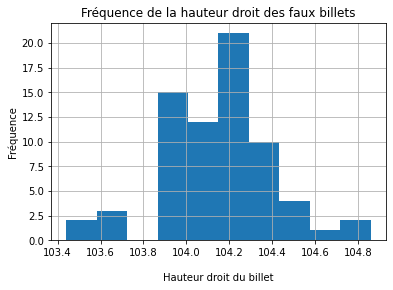

In [338]:
notes_false["height_right"].hist()
plt.title("Fréquence de la hauteur droit des faux billets")
plt.xlabel('\nHauteur droit du billet')
plt.ylabel('Fréquence')

La majorité des faux billets possèdent une hauteur droit du billet entre 103.85 et 104.3 mm.

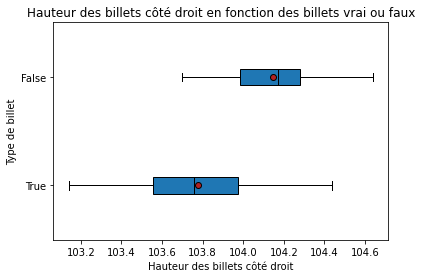

In [339]:
X = "is_genuine"
Y = "height_right"

sous_echantillon = notes


modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title('Hauteur des billets côté droit en fonction des billets vrai ou faux')
plt.xlabel('Hauteur des billets côté droit')
plt.ylabel('Type de billet')
plt.show()

In [340]:
aov_pop = welch_anova(dv='height_right', between='is_genuine', data=notes)

aov_pop

,Source,ddof1,ddof2,F,p-unc,np2
0,is_genuine,1,160.496752,77.184436,2.252842e-15,0.303942


Le test d'anova a montré une p-value inférieur a 0.05 donc il y a une différence significative entre la hauteur droit des vrai et des faux billets. Le faux billet aurait une hauteur plus grande.

<h3> Marge entre le bord inférieur du billet et l'image de celui-ci (en mm)

Text(0, 0.5, 'Fréquence')

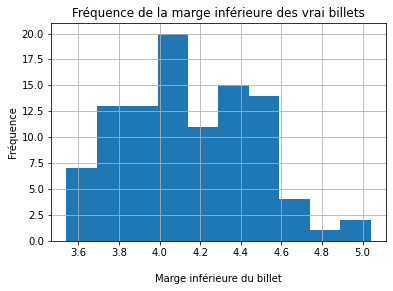

In [341]:
notes_true["margin_low"].hist()
plt.title("Fréquence de la marge inférieure des vrai billets")
plt.xlabel('\nMarge inférieure du billet')
plt.ylabel('Fréquence')

La majorité des vrai billets possèdent une marge entre le bord inférieur du billet entre 3.7 et 4.6 mm.

Text(0, 0.5, 'Fréquence')

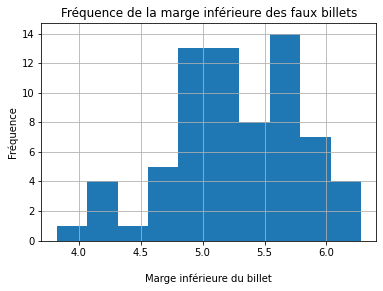

In [342]:
notes_false["margin_low"].hist()
plt.title("Fréquence de la marge inférieure des faux billets")
plt.xlabel('\nMarge inférieure du billet')
plt.ylabel('Fréquence')

La majorité des faux billets possèdent une marge entre le bord inférieur du billet entre 4.7 et 6.7 mm.

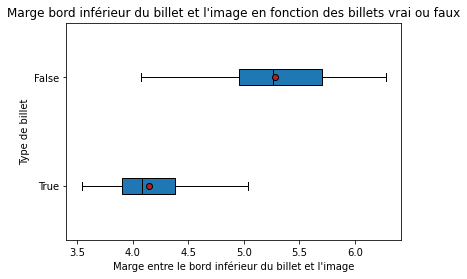

In [343]:
X = "is_genuine"
Y = "margin_low"

sous_echantillon = notes


modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title("Marge bord inférieur du billet et l'image en fonction des billets vrai ou faux")
plt.xlabel("Marge entre le bord inférieur du billet et l'image")
plt.ylabel('Type de billet')
plt.show()

In [344]:
aov_pop = welch_anova(dv='margin_low', between='is_genuine', data=notes)

aov_pop

,Source,ddof1,ddof2,F,p-unc,np2
0,is_genuine,1,101.565752,250.623223,3.511498e-29,0.640177


Le test d'anova a montré une p-value inférieur a 0.05 donc il y a une différence significative entre la marge entre le bord inférieur des vrai et des faux billets. Le faux billet aurait une marge plus grande.

<h3> Marge entre le bord supérieur du billet et l'image de celui-ci (en mm)

Text(0, 0.5, 'Fréquence')

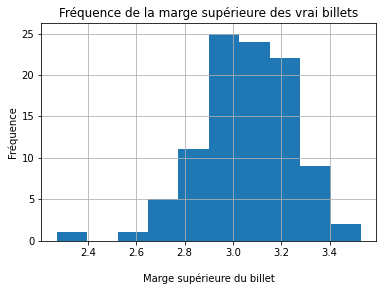

In [345]:
notes_true["margin_up"].hist()
plt.title("Fréquence de la marge supérieure des vrai billets")
plt.xlabel('\nMarge supérieure du billet')
plt.ylabel('Fréquence')

La majorité des vrai billets possèdent une marge entre le bord supérieur du billet entre 2.9 et 3.3 mm.

Text(0, 0.5, 'Fréquence')

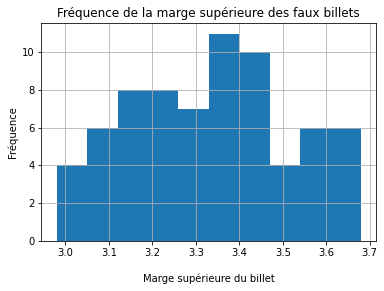

In [346]:
notes_false["margin_up"].hist()
plt.title("Fréquence de la marge supérieure des faux billets")
plt.xlabel('\nMarge supérieure du billet')
plt.ylabel('Fréquence')

La majorité des faux billets possèdent une marge entre le bord supérieur du billet entre 3.1 et 3.5 mm.

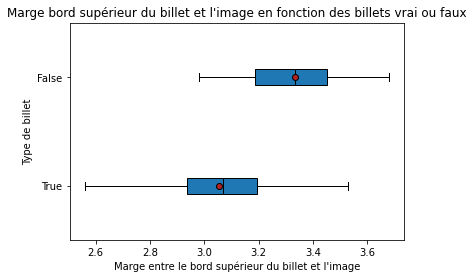

In [347]:
X = "is_genuine"
Y = "margin_up"

sous_echantillon = notes


modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title("Marge bord supérieur du billet et l'image en fonction des billets vrai ou faux")
plt.xlabel("Marge entre le bord supérieur du billet et l'image")
plt.ylabel('Type de billet')
plt.show()

In [348]:
aov_pop = welch_anova(dv='margin_up', between='is_genuine', data=notes)

aov_pop

,Source,ddof1,ddof2,F,p-unc,np2
0,is_genuine,1,154.532819,88.458112,6.811238e-17,0.339657


Le test d'anova a montré une p-value inférieur a 0.05 donc il y a une différence significative entre la marge entre le bord supérieur des vrai et des faux billets. Le faux billet aurait une marge plus grande.

<h3> Longueur du billet (en mm)

Text(0, 0.5, 'Fréquence')

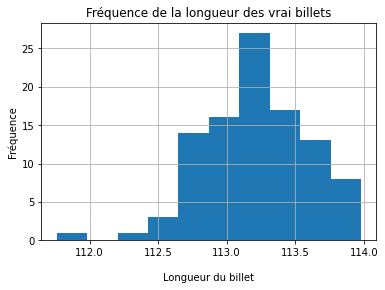

In [349]:
notes_true["length"].hist()
plt.title("Fréquence de la longueur des vrai billets")
plt.xlabel('\nLongueur du billet')
plt.ylabel('Fréquence')

La majorité des vrai billets possèdent une longueur du billet entre 112.7 et 113.5 mm.

Text(0, 0.5, 'Fréquence')

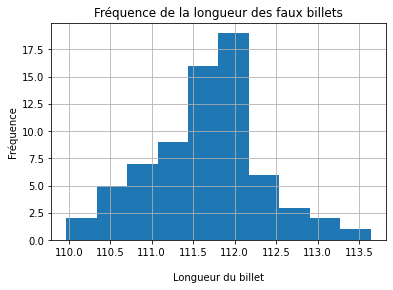

In [350]:
notes_false["length"].hist()
plt.title("Fréquence de la longueur des faux billets")
plt.xlabel('\nLongueur du billet')
plt.ylabel('Fréquence')

La majorité des vrai billets possèdent une longueur du billet entre 111.5 et 112.1 mm.

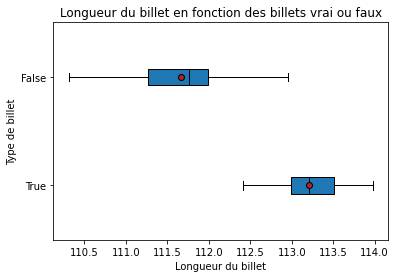

In [351]:
X = "is_genuine"
Y = "length"

sous_echantillon = notes


modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title("Longueur du billet en fonction des billets vrai ou faux")
plt.xlabel("Longueur du billet")
plt.ylabel('Type de billet')
plt.show()

In [352]:
aov_pop = welch_anova(dv='length', between='is_genuine', data=notes)

aov_pop

,Source,ddof1,ddof2,F,p-unc,np2
0,is_genuine,1,99.499978,299.182544,9.405204e-32,0.681851


Le test d'anova a montré une p-value inférieur a 0.05 donc il y a une différence significative entre la longueur des vrai et des faux billets. Le vrai billet aurait une longueur plus grande.

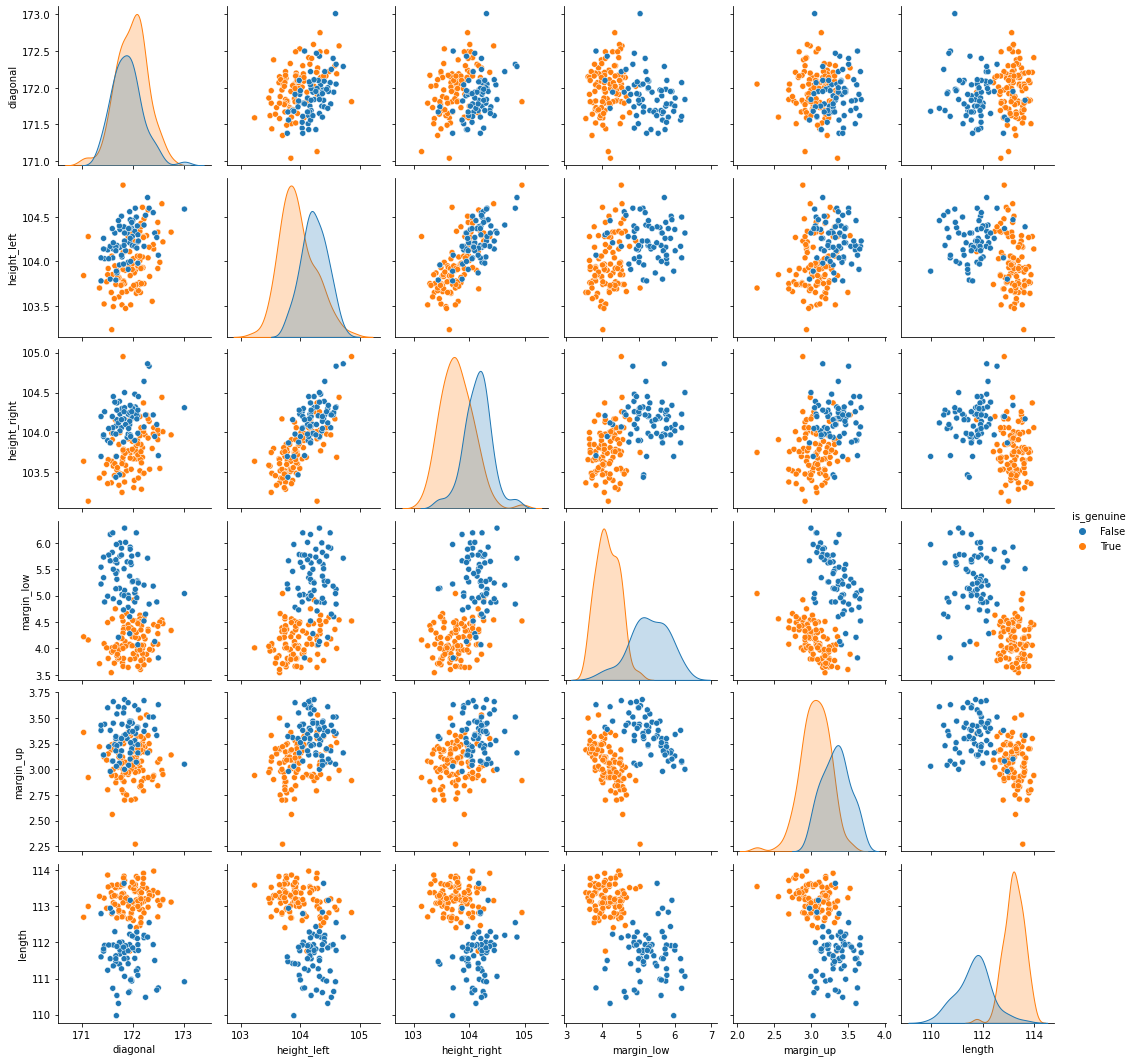

In [353]:
sns.pairplot(notes,hue="is_genuine")
plt.show()

Sur cette figure on remarque deux groupe différent sur chaque graphique montrant des différences entre les caractéristique des vrai et faux billet. cette différence est moins marquer sur la diagonal ou les points sont plus rapprocher et mélanger. 

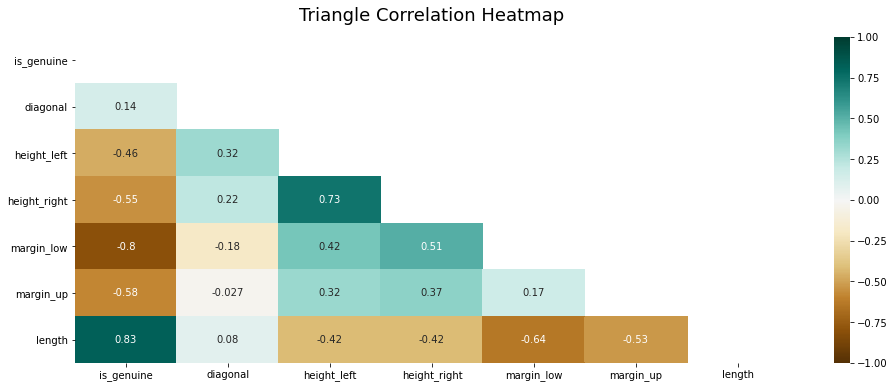

In [354]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(notes.corr(), dtype=np.bool))
heatmap = sns.heatmap(notes.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

il y a une corrélation possitive entre la hauteur du billet droit et gauche. il y a une corrélation négative entre la longueur et la marge entre le bord inférieur.

<h2> <center> PCA

In [355]:
n_comp = 2
data_pca = notes

In [356]:
X = data_pca.drop('is_genuine',axis=1).values

In [357]:
names=notes["is_genuine"]

In [358]:
features = notes.columns

In [359]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [360]:
X_scaled

array([[-0.42834385,  2.6694537 ,  3.09656321, -0.13159013, -1.18987367,
         0.28163308],
       [-0.88755932, -1.09769709, -0.69125444, -0.86012554, -1.27473985,
         0.78069736],
       [-0.36274164, -1.03042654, -0.50943919, -0.30301023, -1.23230676,
         1.37740465],
       ...,
       [ 1.73652911,  0.68497248,  0.52084721,  0.38267015,  0.67718214,
        -2.05094997],
       [-0.39554274, -0.32408577, -0.1458087 ,  0.16839504,  1.61071005,
        -0.75989238],
       [ 0.06367273, -0.22317994,  0.06630909,  1.45404575,  0.38015054,
        -1.74717171]])

In [361]:
model = pca()

In [362]:
out = model.fit_transform(X_scaled)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


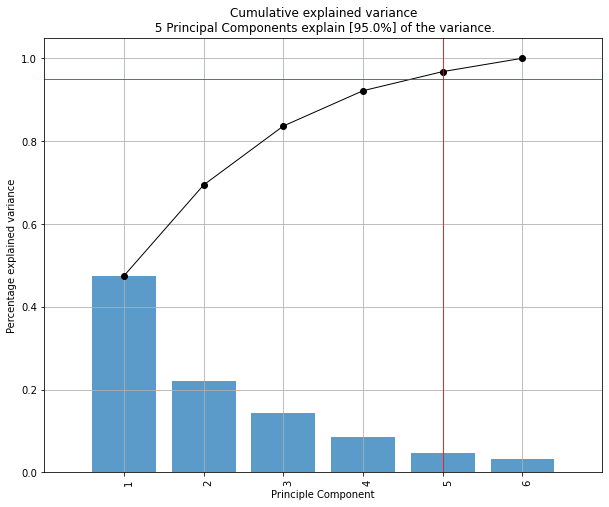

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 5 Principal Components explain [95.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [363]:
model.plot()

Pour 2 composante principale il y a 70 % de l'information qui est retenu. 

In [364]:
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=2)

In [365]:
final_pca = out['PC'][["PC1","PC2"]].reset_index()

In [366]:
final_pca.drop("index",inplace=True,axis=1)

In [367]:
final_pca['is_genuine']=notes['is_genuine']

In [368]:
final_pca

,PC1,PC2,is_genuine
0,2.153639,1.599709,True
1,-2.110416,-0.526039,True
2,-1.973152,-0.048102,True
3,-2.059795,-0.089105,True
4,-2.403180,0.412170,True
...,...,...,...
165,2.478626,0.189974,False
166,2.585331,2.914472,False
167,2.067245,0.845602,False
168,0.739257,-0.972965,False


In [369]:
df_groupby_is_genuine_pca=final_pca.groupby("is_genuine").mean()

df_groupby_is_genuine_pca

,PC1,PC2
is_genuine,,
False,1.691374,-0.502571
True,-1.183962,0.351800


In [370]:
df_groupby_is_genuine_pca['is_genuine']=['False centroïde','True centroïde']

In [371]:
final_pca_centroide = final_pca.append(df_groupby_is_genuine_pca)

final_pca_centroide

,PC1,PC2,is_genuine
0,2.153639,1.599709,True
1,-2.110416,-0.526039,True
2,-1.973152,-0.048102,True
3,-2.059795,-0.089105,True
4,-2.403180,0.412170,True
...,...,...,...
167,2.067245,0.845602,False
168,0.739257,-0.972965,False
169,1.504992,-1.079725,False
False,1.691374,-0.502571,False centroïde


In [372]:
fig = px.scatter(final_pca_centroide, x="PC1", y="PC2", color = "is_genuine", hover_name = "is_genuine",title='Analyse en composantes principales')
fig.show()

On observe deux groupes distinct sur les plans PC1 et PC2

<h2> <Center> Cercle de corrélation

In [373]:
from sklearn.decomposition import PCA 

In [374]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)
for i in range(0, 2):
    notes['PC' + str(i + 1)] = reduced[:, i]

In [375]:
notes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,PC1,PC2
0,True,171.81,104.86,104.95,4.52,2.89,112.83,2.153639,1.599709
1,True,171.67,103.74,103.70,4.01,2.87,113.29,-2.110416,-0.526039
2,True,171.83,103.76,103.76,4.40,2.88,113.84,-1.973152,-0.048102
3,True,171.80,103.78,103.65,3.73,3.12,113.63,-2.059795,-0.089105
4,True,172.05,103.70,103.75,5.04,2.27,113.55,-2.403180,0.412170
...,...,...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78,2.478626,0.189974
166,False,173.01,104.59,104.31,5.04,3.05,110.91,2.585331,2.914472
167,False,172.47,104.27,104.10,4.88,3.33,110.68,2.067245,0.845602
168,False,171.82,103.97,103.88,4.73,3.55,111.87,0.739257,-0.972965


In [376]:
X_scaled.shape

(170, 6)

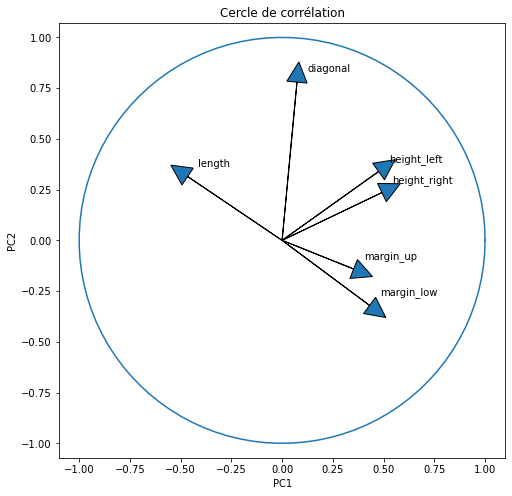

In [377]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             notes.drop(labels=['is_genuine'],axis=1).columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Cercle de corrélation')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Pour les plans PC1 et PC2 on observe une corrélation entre la hauteur droite et gauche, ainsi que entre la marge haut et bas. il y a une corrélation négative entre la longueur et la marche du bas.

<h2> <center> K-means 

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
n_clust = 2

# import de l'échantillon
data = final_pca.drop('is_genuine',axis=1)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)

# Récupération des clusters attribués à chaque individu
clusters = km.fit_predict(X_scaled)



In [379]:
data

,PC1,PC2
0,2.153639,1.599709
1,-2.110416,-0.526039
2,-1.973152,-0.048102
3,-2.059795,-0.089105
4,-2.403180,0.412170
...,...,...
165,2.478626,0.189974
166,2.585331,2.914472
167,2.067245,0.845602
168,0.739257,-0.972965


In [380]:
final_pca['Cluster']=clusters

In [381]:
final_pca

,PC1,PC2,is_genuine,Cluster
0,2.153639,1.599709,True,1
1,-2.110416,-0.526039,True,0
2,-1.973152,-0.048102,True,0
3,-2.059795,-0.089105,True,0
4,-2.403180,0.412170,True,0
...,...,...,...,...
165,2.478626,0.189974,False,1
166,2.585331,2.914472,False,1
167,2.067245,0.845602,False,1
168,0.739257,-0.972965,False,1


C:\Users\Lena\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Lena\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



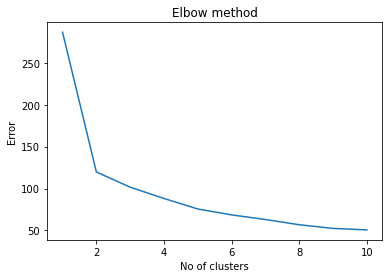

In [382]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

La coubre descend de manière brusque au niveau de 2 clusters. C'est donc le nombre de clusteur le plus idéal.

In [383]:
kmeans.cluster_centers_

array([[172.07058824, 104.25647059, 104.02058824,   4.32823529,
          3.1       , 112.72647059],
       [171.9828    , 104.2804    , 104.302     ,   5.0684    ,
          3.44      , 111.9616    ],
       [171.87777778, 104.19222222, 104.16      ,   5.88888889,
          3.16666667, 110.82888889],
       [171.84444444, 103.75111111, 103.62703704,   4.20111111,
          2.95259259, 113.49148148],
       [172.12761905, 103.95714286, 103.83571429,   3.84809524,
          3.22380952, 113.33714286],
       [172.19909091, 104.31636364, 104.09636364,   4.47363636,
          3.38727273, 110.93727273],
       [171.70285714, 104.23571429, 104.16142857,   5.71142857,
          3.18142857, 112.87714286],
       [172.29529412, 104.15117647, 103.95411765,   4.45235294,
          2.91823529, 113.35176471],
       [171.60611111, 103.77444444, 103.52666667,   3.94666667,
          3.10777778, 112.97277778],
       [171.65055556, 104.12      , 103.94833333,   5.58944444,
          3.29277778, 111.6

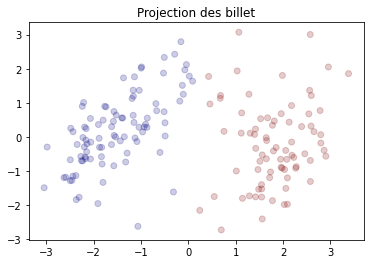

In [384]:
pca = decomposition.PCA(n_components=3).fit(final_pca)
X_projected = pca.transform(final_pca)
ax = plt.gca()
ax.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des billet".format(X_projected.shape[0]))
plt.show(block=False)

on remarque une séparation de deux groupes à l'aide de l'algorithme du k-means.

In [385]:
final_pca['is_genuine_boolean']=np.where(final_pca["is_genuine"]== True, 0,1)
final_pca

,PC1,PC2,is_genuine,Cluster,is_genuine_boolean
0,2.153639,1.599709,True,1,0
1,-2.110416,-0.526039,True,0,0
2,-1.973152,-0.048102,True,0,0
3,-2.059795,-0.089105,True,0,0
4,-2.403180,0.412170,True,0,0
...,...,...,...,...,...
165,2.478626,0.189974,False,1,1
166,2.585331,2.914472,False,1,1
167,2.067245,0.845602,False,1,1
168,0.739257,-0.972965,False,1,1


In [386]:
final_pca['kmean_vs_true']= np.where(final_pca['Cluster'] == final_pca['is_genuine_boolean'],final_pca['is_genuine_boolean'],2)
final_pca


,PC1,PC2,is_genuine,Cluster,is_genuine_boolean,kmean_vs_true
0,2.153639,1.599709,True,1,0,2
1,-2.110416,-0.526039,True,0,0,0
2,-1.973152,-0.048102,True,0,0,0
3,-2.059795,-0.089105,True,0,0,0
4,-2.403180,0.412170,True,0,0,0
...,...,...,...,...,...,...
165,2.478626,0.189974,False,1,1,1
166,2.585331,2.914472,False,1,1,1
167,2.067245,0.845602,False,1,1,1
168,0.739257,-0.972965,False,1,1,1


In [387]:
final_pca[final_pca['kmean_vs_true'] == 2]

,PC1,PC2,is_genuine,Cluster,is_genuine_boolean,kmean_vs_true
0,2.153639,1.599709,True,1,0,2
5,1.235656,2.983191,True,1,0,2
9,0.727490,1.063881,True,1,0,2
10,0.495826,1.738478,True,1,0,2
65,0.736937,1.146021,True,1,0,2
69,0.765438,0.073366,True,1,0,2
84,1.145082,1.837529,True,1,0,2
96,0.487370,0.916649,True,1,0,2
144,-0.435376,-1.554947,False,0,1,2


On observe 8 billet qui ont été mal classés, 7 billets qui sont dit vrai on été classés dans la catégorie faux et 1 qui est faux a été classés dans la catégorie vrai.

In [388]:
km = KMeans(n_clusters=n_clust)
km.fit(final_pca)

KMeans(n_clusters=2)

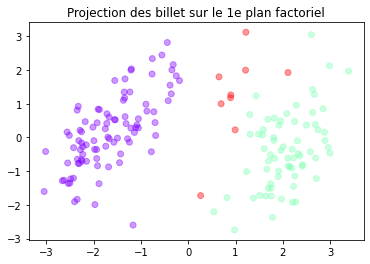

In [389]:
pca = decomposition.PCA(n_components=2).fit(final_pca)
X_projected = pca.transform(final_pca)
centroids = km.cluster_centers_
ax = plt.gca()
ax.scatter(X_projected[:, 0], X_projected[:, 1],c=final_pca.kmean_vs_true, cmap = 'rainbow', alpha=.4)
plt.title("Projection des billet sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

Les billet mal classé sont indiqué en rouge et se trouve à la limite des deux clusteurs.

<h2> <center> K-means données brutes

Une deuxième classification k-means a été effectué avec les données brutes car la PCA induit la pertes de certaines informations.

In [473]:
notes_kmeans = notes.copy()

In [474]:
# préparation des données pour le clustering
X_df = notes_kmeans.drop('is_genuine',axis=1).values

# Clustering par K-means
km_df = KMeans(n_clusters=n_clust)

# Récupération des clusters attribués à chaque individu
clusters_df = km_df.fit_predict(X_df)

print(clusters_df)

[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [475]:
notes_kmeans['is_genuine_boolean']=np.where(notes_kmeans["is_genuine"]== True, 0,1)
notes_kmeans['Cluster_kmeans']= clusters_df

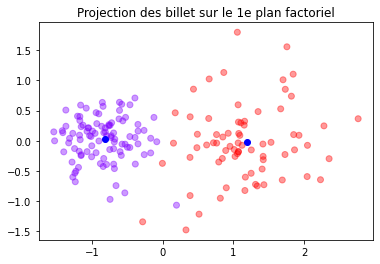

In [476]:
pca_df = decomposition.PCA(n_components=3).fit(notes_kmeans[['diagonal','height_left','height_right','margin_low','margin_up','length']])
X_projected_df = pca_df.transform(notes_kmeans[['diagonal','height_left','height_right','margin_low','margin_up','length']])

km_df.fit(notes_kmeans[['diagonal','height_left','height_right','margin_low','margin_up','length']])
centroids_df = km_df.cluster_centers_
centroids_projected_df = pca_df.transform(centroids_df)

ax = plt.gca()
ax.scatter(X_projected_df[:, 0], X_projected_df[:, 1],c=clusters_df.astype(np.float), cmap = 'rainbow', alpha=.4)
ax.scatter(centroids_projected_df[:,0],centroids_projected_df[:,1],color='blue')
plt.title("Projection des billet sur le 1e plan factoriel".format(X_projected_df.shape[0]))
plt.show(block=False)

In [477]:
notes_kmeans['kmean_vs_true']= np.where(notes_kmeans['Cluster_kmeans'] == notes_kmeans['is_genuine_boolean'],notes_kmeans['is_genuine_boolean'],2)
notes_kmeans

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,PC1,PC2,is_genuine_boolean,Cluster_kmeans,kmean_vs_true
0,True,171.81,104.86,104.95,4.52,2.89,112.83,2.153639,1.599709,0,1,2
1,True,171.67,103.74,103.70,4.01,2.87,113.29,-2.110416,-0.526039,0,0,0
2,True,171.83,103.76,103.76,4.40,2.88,113.84,-1.973152,-0.048102,0,0,0
3,True,171.80,103.78,103.65,3.73,3.12,113.63,-2.059795,-0.089105,0,0,0
4,True,172.05,103.70,103.75,5.04,2.27,113.55,-2.403180,0.412170,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78,2.478626,0.189974,1,1,1
166,False,173.01,104.59,104.31,5.04,3.05,110.91,2.585331,2.914472,1,1,1
167,False,172.47,104.27,104.10,4.88,3.33,110.68,2.067245,0.845602,1,1,1
168,False,171.82,103.97,103.88,4.73,3.55,111.87,0.739257,-0.972965,1,1,1


In [478]:
notes_kmeans[notes_kmeans['kmean_vs_true'] == 2]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,PC1,PC2,is_genuine_boolean,Cluster_kmeans,kmean_vs_true
0,True,171.81,104.86,104.95,4.52,2.89,112.83,2.153639,1.599709,0,1,2
9,True,172.14,104.34,104.20,4.63,3.02,112.47,0.727490,1.063881,0,1,2
69,True,171.94,104.11,104.16,4.08,3.35,111.76,0.765438,0.073366,0,1,2
144,False,171.56,103.80,103.87,5.66,2.98,112.95,-0.435376,-1.554947,1,0,2


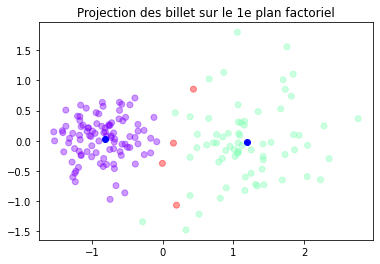

In [479]:
pca_df = decomposition.PCA(n_components=3).fit(notes_kmeans[['diagonal','height_left','height_right','margin_low','margin_up','length']])
X_projected_df = pca_df.transform(notes_kmeans[['diagonal','height_left','height_right','margin_low','margin_up','length']])

km_df.fit(notes_kmeans[['diagonal','height_left','height_right','margin_low','margin_up','length']])
centroids_df = km_df.cluster_centers_
centroids_projected_df = pca_df.transform(centroids_df)

ax = plt.gca()
ax.scatter(X_projected_df[:, 0], X_projected_df[:, 1], c=notes_kmeans.kmean_vs_true, cmap = 'rainbow', alpha=.4)
ax.scatter(centroids_projected_df[:,0],centroids_projected_df[:,1],color='blue')
plt.title("Projection des billet sur le 1e plan factoriel".format(X_projected_df.shape[0]))
plt.show(block=False)

En utilisant que les données brutes, on remarque que 4 billets mal classés par la classification k-means.

<h2> <center> Matrice de confustion k-means

**Données PCA**

In [397]:
from sklearn import metrics
cnf_matrix2 = metrics.confusion_matrix(final_pca.Cluster, final_pca.is_genuine_boolean)
cnf_matrix2

array([[92,  1],
       [ 8, 69]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

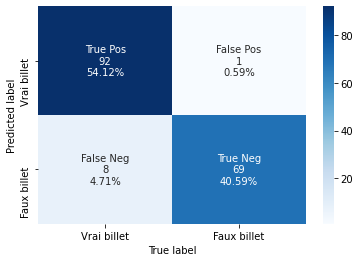

In [470]:
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix2.flatten()/np.sum(cnf_matrix2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix2, annot=labels, fmt='', cmap='Blues',xticklabels=["Vrai billet","Faux billet"],yticklabels=["Vrai billet","Faux billet"])
plt.xlabel("True label")
plt.ylabel("Predicted label")

**Données brutes**

In [480]:
from sklearn import metrics
cnf_matrix3 = metrics.confusion_matrix(notes_kmeans.Cluster_kmeans, notes_kmeans.is_genuine_boolean)
cnf_matrix3

array([[97,  1],
       [ 3, 69]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

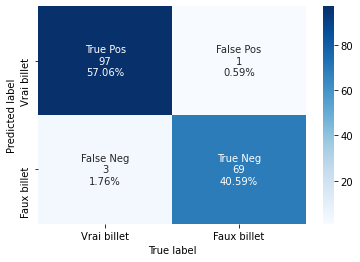

In [481]:
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix3.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix3.flatten()/np.sum(cnf_matrix3)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix3, annot=labels, fmt='', cmap='Blues',xticklabels=["Vrai billet","Faux billet"],yticklabels=["Vrai billet","Faux billet"])
plt.xlabel("True label")
plt.ylabel("Predicted label")

<h2> <center> Régression logistique

In [401]:
notes['is_genuine_boolean']=np.where(final_pca["is_genuine"]== True, 0,1)
notes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,PC1,PC2,is_genuine_boolean
0,True,171.81,104.86,104.95,4.52,2.89,112.83,2.153639,1.599709,0
1,True,171.67,103.74,103.70,4.01,2.87,113.29,-2.110416,-0.526039,0
2,True,171.83,103.76,103.76,4.40,2.88,113.84,-1.973152,-0.048102,0
3,True,171.80,103.78,103.65,3.73,3.12,113.63,-2.059795,-0.089105,0
4,True,172.05,103.70,103.75,5.04,2.27,113.55,-2.403180,0.412170,0
...,...,...,...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78,2.478626,0.189974,1
166,False,173.01,104.59,104.31,5.04,3.05,110.91,2.585331,2.914472,1
167,False,172.47,104.27,104.10,4.88,3.33,110.68,2.067245,0.845602,1
168,False,171.82,103.97,103.88,4.73,3.55,111.87,0.739257,-0.972965,1


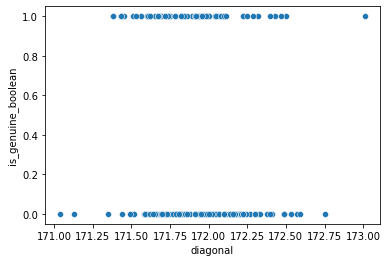

In [402]:
ax = sns.scatterplot(x="diagonal", y="is_genuine_boolean", data=notes)

On observe que les valeurs sont plutôt regroupé de la même manière pour les deux type de billets.

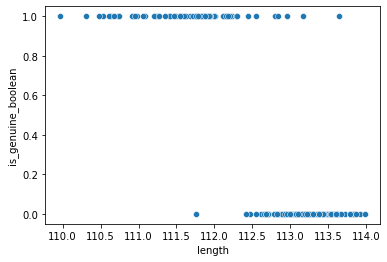

In [403]:
ax = sns.scatterplot(x="length", y="is_genuine_boolean", data=notes)

On observe que les valeurs sont allongés pour les billets de type vrai et regroupés vers la droite pour les billets faux.

**Sélection des données**

In [404]:
scaler = StandardScaler()
billet = dict( zip (notes.is_genuine_boolean.unique(), notes.is_genuine.unique()))
print( billet )
x = notes [['diagonal', 'height_left', 'height_right','margin_low','margin_up','length']]
y = notes['is_genuine_boolean']

{0: True, 1: False}


**Découpage d'un dataset en ensemble d'entraînement et ensemble de test par Scikit-learn**

In [405]:
#fractionner dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0,test_size=0.33)
print("Training records: {}".format(x_train.shape[0]))
print("Testing records: {}".format(x_test.shape[0]))

Training records: 113
Testing records: 57


**Normalisation des données : utilisation d'un scaler qui normalise par rapport aux données d'entrainement**

In [406]:
#fit transform train 
x_train_scale = scaler.fit_transform(x_train)
#tranform test
x_test_scale = scaler.transform(x_test)

**Détermination du modèle de classification et entraînement du modèle sur les features X et les targets Y**

In [407]:
#instanciation du modèle
modele_regLog = linear_model.LogisticRegression(random_state = 0,
solver = 'liblinear', multi_class = 'auto')
#faire scale 
modele_regLog.fit(x_train_scale,y_train)
#précision du modèle
precision = modele_regLog.score(x_test_scale,y_test)
print(precision*100)

100.0


**Détermination des attributs du modèle**

In [408]:
modele_regLog.intercept_

array([-0.90256326])

In [409]:
modele_regLog.coef_

array([[-0.04221945,  0.06718543,  0.40434286,  2.11177064,  1.31175411,
        -1.55934219]])

La regression logistique est un classificateur linéaire de la fonction linéaire f(x) = -0.90 - 0.04 * diagonal + 0.07 * height_left + 0.40 * height_right + 2.11 * margin_low + 1.31 * margin_up - 1.6 * length

La fonction de régression logistique p(x) = 1 / (1 + exp(−𝑓(𝐱))

**Prédiction de la probabilité d'être 0 ou 1**

In [410]:
#Evaluate the Model : Matrix of probabilities that the predicted output is equal to zero or one
print(modele_regLog.predict_proba(x_train_scale))

[[9.91814011e-01 8.18598939e-03]
 [1.98857879e-02 9.80114212e-01]
 [9.25306231e-01 7.46937688e-02]
 [2.72530586e-03 9.97274694e-01]
 [5.12176378e-02 9.48782362e-01]
 [9.91319930e-01 8.68007041e-03]
 [9.62931373e-03 9.90370686e-01]
 [1.08417721e-02 9.89158228e-01]
 [9.94396852e-01 5.60314761e-03]
 [9.89705703e-01 1.02942973e-02]
 [9.96001146e-01 3.99885419e-03]
 [9.82319655e-01 1.76803446e-02]
 [9.95126590e-01 4.87341029e-03]
 [9.93051715e-01 6.94828493e-03]
 [9.40541182e-01 5.94588182e-02]
 [9.09170891e-01 9.08291087e-02]
 [1.44646225e-02 9.85535377e-01]
 [9.95488252e-01 4.51174776e-03]
 [1.63670335e-02 9.83632967e-01]
 [2.96505124e-02 9.70349488e-01]
 [3.92514900e-02 9.60748510e-01]
 [9.93295058e-01 6.70494163e-03]
 [2.48073593e-03 9.97519264e-01]
 [1.99493245e-03 9.98005068e-01]
 [9.95703177e-01 4.29682278e-03]
 [4.48845576e-02 9.55115442e-01]
 [1.71297036e-02 9.82870296e-01]
 [9.53779167e-01 4.62208330e-02]
 [1.86344126e-01 8.13655874e-01]
 [2.45457398e-01 7.54542602e-01]
 [4.286570

Chaque ligne correspond à un billet.La première colonne est la probabilité que la sortie prédite soit 0, c'est-à-dire 1 - 𝑝 (𝑥). La deuxième colonne est la probabilité que la sortie soit 1, ou 𝑝 (𝑥)

**Prédiction des billets**

In [411]:
y_pred=modele_regLog.predict(x_test_scale)

In [412]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

On observe les prédictions réelles basées sur la matrice de probabilité.

**Détermination du score de prédiction**

In [413]:
modele_regLog.score(x_train_scale,y_train)

0.9911504424778761

Ce score représente le rapport le rapport entre le nombre de prédictions correctes et le nombre d'observations.Ainsi si on a 9 observations sur 10 classées correctement, la précision de votre modèle serai égale à 9/10 = 0,9. On observe que le score du modèle est de 0,99 ce qui est très efficace.

**Test de prédiction sur un exemple**

In [414]:
notes.iloc[0]

is_genuine               True
diagonal               171.81
height_left            104.86
height_right           104.95
margin_low               4.52
margin_up                2.89
length                 112.83
PC1                   2.15364
PC2                   1.59971
is_genuine_boolean          0
Name: 0, dtype: object

In [415]:
#prédiction
prediction_billet = modele_regLog.predict([[171.60,103.7,103.6,4.4,2.8,113.5]])
billet[prediction_billet[0]]

True

In [416]:
#prédiction
prediction_billet = modele_regLog.predict(scaler.transform([[160.1,120.3,120.4,6.6,4.1,130.6]]))
billet[prediction_billet[0]]

False

<h2> <center> Matrice de confusion

In [417]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[32,  0],
       [ 0, 25]], dtype=int64)

Text(33.0, 0.5, 'Predicted label')

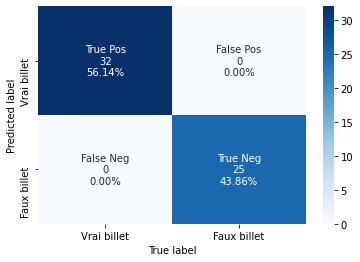

In [472]:
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=["Vrai billet","Faux billet"],yticklabels=["Vrai billet","Faux billet"])
plt.xlabel("True label")
plt.ylabel("Predicted label")

Cette matrice permet d'évaluer les performances du modèle de classification. Elle permet de résumé le nombre de prédictions correctes et incorrectes par classe. On remarque que les prédictions sont correctes avec 0 faux positif et 0 faux négatif.

In [419]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [420]:
from sklearn.metrics import classification_report

In [421]:
target_names = ["Vrai billet", "Faux billet"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Vrai billet       1.00      1.00      1.00        32
 Faux billet       1.00      1.00      1.00        25

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



Le rapport de classification montre une les principaux paramètres du modèle.

La précision détermine quel pourcentage des prédictions était correct donc l'exactitude des prévisions positives. Pour chaque classe, il est défini comme le rapport des vrais positifs à la somme d'un vrai positif et d'un faux positif.

Le recall détermine quel pourcentage des cas positifs a été détecté donc la fraction de positifs correctement identifiés. Pour chaque classe, il est défini comme le rapport des vrais positifs à la somme des vrais positifs et des faux négatifs. Rappel: - Fraction de positifs correctement identifiés.

Le score F1 est une moyenne harmonique pondérée de la précision et le rappel ( le meilleur score est de 1,0 et le pire est de 0,0).

<h2> <center> Courbe ROC AUC

In [422]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
probas = modele_regLog.predict_proba(x_test_scale)[:, 1]

In [423]:
roc_auc_score(y_test, y_pred)

1.0

In [424]:
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]


In [425]:
roc_values = []
for thresh in np.linspace(0, 1, 100):
    y_pred = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)


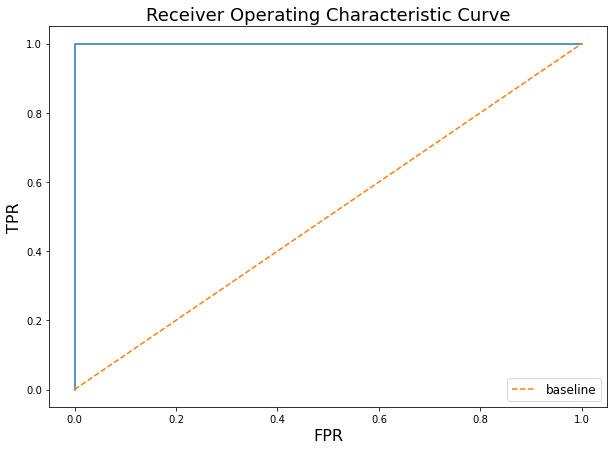

In [426]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

La courbe ROC (Receiver Operating Characteristic) est tracé à l'aide du taux de vrais positifs par rapport au taux de faux positifs. Il montre le compromis entre sensibilité et spécificité. On voit bien qu'il n'y a pas de mauvaise prédiction du modèle.

<h2> <center> SHAP Values

**Interprétation du modèle à l'aide de Shap**

In [427]:
Explainer = shap.Explainer(modele_regLog,x_train_scale,feature_names=['diagonal', 'height_left', 'height_right','margin_low','margin_up','length'])

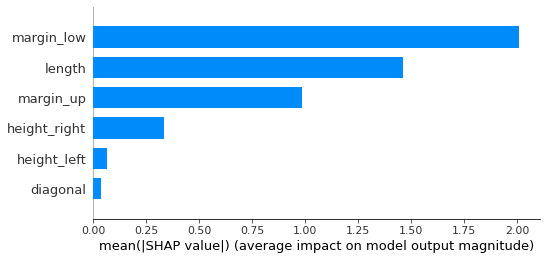

In [428]:
shap_values = Explainer(x_test_scale)
shap.summary_plot(shap_values, x_test_scale, plot_type="bar")

Les valeurs SHAP décomposent une prédiction pour montrer l'impact de chaque paramètre. Les valeurs SHAP interprètent l'impact d'avoir une certaine valeur pour un paramètre donnée par rapport à la prédiction que nous ferions si cette paramètre prenait une valeur de base.

Ainsi on remarque que les paramètres ayant le plus d'impact sur le classificateur sont la marge inférieure, la longueur et la marge supérieure.

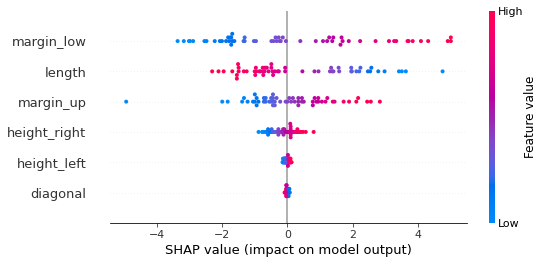

In [429]:
f = plt.figure()
shap.summary_plot(shap_values, x_test_scale)

La position verticale des paramètres permet de déterminer qui a le plus d'impact sur le classificateur, la position horizontale des points détermine si l'effet du paramètre provoque une prédiction inférieure(0 = True) ou supérieure (1=false), la couleur indique si cette caractéristique est élevé ou faible dans les données brutes.

On remarque ainsi que la marge inférieure a le plus d'effet sur le modèle, lorsqu'il est grand les billets ont tendance à être faux et inversement. Il en est de même pour la marge supérieure qui a un peu moins d'impact sur le modèle que la marge supérieure mais qui lorsqu'il est grand, les billet ont tendance à être faux. A l'inverse, lorsque la longueur du billet est faible les billets ont tendance à être faux et lorsqu'il est grand les billets sont vrais.

In [430]:
shap.initjs()

**Faux billet**

In [431]:
shap.plots.force(shap_values[0])

On remarque que ce billet est caractérisé par une valeur de prédiction de 5.29, induit par les paramètres suivant : la marge supérieure et inférieure, la longueur et la hauteur droite. Ces paramètres sont en rouge donc influence possitivement le billet (prédiction vers 1).

In [432]:
shap.plots.force(shap_values[3])

On remarque que ce billet est caractérisé par une valeur de prédiction de -5.22, induit par les principaux paramètres suivant : la hauteur droite, la longueur, la marge inférieure et supérieure. Ces paramètres sont en bleu donc influence négativement le billet (prédiction vers 0).

<h2><center> Programme de prédiction des billets

In [433]:
def detect_billet (path_csv_billet):
    df_billet=pd.read_csv(path_csv_billet)
    X_scaled=scaler.transform(df_billet.drop('id',axis=1))
    proba=modele_regLog.predict_proba(X_scaled)
    df_billet['proba']=proba[:,0]
    df_billet['Billet']=np.where(df_billet['proba']>0.5,'Vrai billet','Faux billet')
    
    return df_billet

In [434]:
df_test = detect_billet("file:///C:/Users/Lena/OneDrive/OpenClassRoom/Projet%206/example.csv")
df_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id,proba,Billet
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0.031624,Faux billet
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.003954,Faux billet
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0.018479,Faux billet
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0.933214,Vrai billet
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0.995055,Vrai billet


In [435]:
filepath="file:///C:/Users/Lena/OneDrive/OpenClassRoom/Projet%206/example.csv"
test=pd.read_csv(filepath)

In [436]:
test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [437]:
#prédiction
prediction_billet = modele_regLog.predict_proba([[172.11,104.23,104.45,5.24,3.58,111.78]])
#billet[prediction_billet[0]]

In [438]:
prediction_billet

array([[1.00000000e+00, 9.58604634e-52]])

<h2> <center> Pickling

Pickle permet de rendre indépendant des modèles comme le classificateur pour le scaler.

In [439]:
import pickle

**Modèle de regression**

In [440]:
# Save to file in the current working directory
pkl_filename_regression = "D:/Lena/Desktop/OpenClassroom/Projet_6/pickle_model_regression.pkl"
with open(pkl_filename_regression, 'wb') as file_regression:
    pickle.dump(modele_regLog, file_regression)

In [441]:
# Load from file
pkl_filename_regression = "D:/Lena/Desktop/OpenClassroom/Projet_6/pickle_model_regression.pkl"
with open(pkl_filename_regression, 'rb') as file_regression:
    pickle_regression = pickle.load(file_regression)

In [442]:
pickle_regression

LogisticRegression(random_state=0, solver='liblinear')

**Le scaler normalisé**

In [443]:
# Save to file in the current working directory
pkl_filename_scaler = "D:/Lena/Desktop/OpenClassroom/Projet_6/pickle_model_scaler.pkl"
with open(pkl_filename_scaler, 'wb') as file_scaler:
    pickle.dump(scaler, file_scaler)

# Load from file
with open(pkl_filename_scaler, 'rb') as file_scaler:
    pickle_scaler = pickle.load(file_scaler)

In [444]:
pickle_scaler

StandardScaler()